In [1]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
import pandas as pd
import numpy as np

plt.style.use(astropy_mpl_style)
%matplotlib inline

In [2]:
image_filename = "../datasets/test.fits"

In [3]:
with fits.open(image_filename) as hdul:
    data = hdul[0].data
    hdr = hdul[0].header

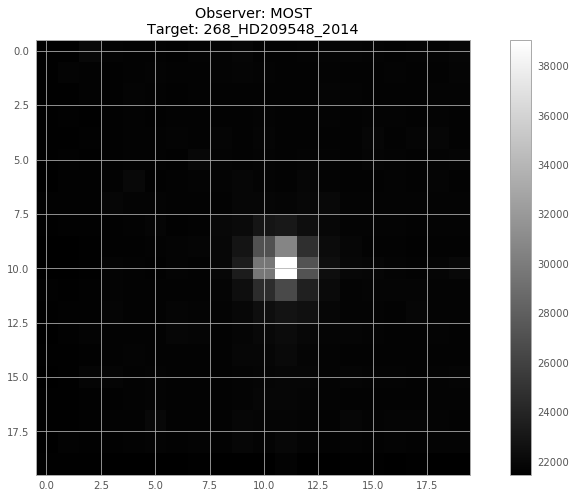

In [4]:
plt.figure(figsize=(14, 8))
plt.imshow(data, cmap="gray")
plt.colorbar()

plt.title("Observer: {}\nTarget: {}".format(hdr["OBSERVER"], hdr["TARGET"]))
plt.show()

In [5]:
type(data)

numpy.ndarray

In [6]:
data.shape

(20, 20)

In [22]:
df = pd.DataFrame(
    np.array(data).byteswap().newbyteorder()
)

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,21562,21568,22022,21752,21716,21696,21644,21742,21758,21865,21714,21694,21726,21826,21829,21726,21706,21766,21745,21909
1,21526,21741,21710,21626,21708,21779,21703,21658,21760,21830,21751,21721,21703,21787,21694,21669,21749,21673,21720,21846
2,21518,21568,21719,21586,21734,21657,21649,21661,21698,21706,21717,21696,21681,21806,21752,21716,21695,21696,21783,21735
3,21520,21606,21585,21614,21709,21625,21677,21672,21693,21694,21735,21686,21704,21769,21697,21791,21758,21680,21747,21700
4,21526,21534,21647,21640,21697,21679,21771,21660,21855,21710,21834,21690,21698,21679,21703,21926,21713,21823,21919,21677
5,21522,21628,21573,21628,21696,21680,21642,21942,21745,21707,21731,21721,21748,21741,21722,21807,21789,21706,21750,21835
6,21506,21600,21624,21663,22015,21645,21717,21724,21731,21878,21761,21694,21894,21732,21722,21694,21760,21694,21793,21698
7,21590,21597,21598,21895,21773,21738,21675,21686,21707,21879,21919,21860,21947,22022,21730,21726,21733,21773,21748,21740
8,21526,21588,21629,21627,21692,21793,21650,21684,22032,22165,22919,23146,22479,21984,21783,21777,21754,21713,21741,21791
9,21505,21503,21556,21616,21626,21667,21738,21816,21944,22881,27031,30633,24722,22267,21920,21719,21691,21605,21713,21692


In [25]:
df.values

array([[21562, 21568, 22022, 21752, 21716, 21696, 21644, 21742, 21758,
        21865, 21714, 21694, 21726, 21826, 21829, 21726, 21706, 21766,
        21745, 21909],
       [21526, 21741, 21710, 21626, 21708, 21779, 21703, 21658, 21760,
        21830, 21751, 21721, 21703, 21787, 21694, 21669, 21749, 21673,
        21720, 21846],
       [21518, 21568, 21719, 21586, 21734, 21657, 21649, 21661, 21698,
        21706, 21717, 21696, 21681, 21806, 21752, 21716, 21695, 21696,
        21783, 21735],
       [21520, 21606, 21585, 21614, 21709, 21625, 21677, 21672, 21693,
        21694, 21735, 21686, 21704, 21769, 21697, 21791, 21758, 21680,
        21747, 21700],
       [21526, 21534, 21647, 21640, 21697, 21679, 21771, 21660, 21855,
        21710, 21834, 21690, 21698, 21679, 21703, 21926, 21713, 21823,
        21919, 21677],
       [21522, 21628, 21573, 21628, 21696, 21680, 21642, 21942, 21745,
        21707, 21731, 21721, 21748, 21741, 21722, 21807, 21789, 21706,
        21750, 21835],
       [21

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [26]:
hdr

SIMPLE  =                    T / Written by IDL:  Thu Jan 21 16:46:10 2016      
BITPIX  =                   32 / length of data axis 1                          
NAXIS   =                    2 / data unit checksum updated 2014-10-09T06:38:39 
NAXIS1  =                   20 / IMAGE extension                                
NAXIS2  =                   20 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2014-10-09T06:38:39' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
TELESCOP= 'MOST    '           / TELESCOPE                                      
DATE-REL= '2035-12-12T00:00:00.00' /Release Date.Default = "12-31-2035T00:00:00.
VRSNARCH= '6.0.0.29'           / ARCHIVE VERSION                                
VRSNFITS=                   

In [27]:
exposure_date = hdr["DATE-OBS"]
observer = hdr["OBSERVER"]
target = hdr["TARGET"]
amplifier_value = hdr["OPAMP"]
gain = hdr["GAIN"]
magnetic_field = hdr["MAG_FLD"]
error_number = hdr["ERR_NUMB"]
heater_voltage = hdr["HEATER_V"]
ccd_temp = hdr["T_CCD"]
board_temp = hdr["T_BOARD"]
preamp_temp = hdr["T_PREAMP"]

In [112]:
ccd_temp

237.982

In [29]:
observer

'MOST'

In [30]:
target

'268_HD209548_2014'

In [31]:
amplifier_value

3

In [32]:
magnetic_field

22098.867

In [48]:
values_lst = np.concatenate(data).ravel().tolist()

In [49]:
values_lst

[21562,
 21568,
 22022,
 21752,
 21716,
 21696,
 21644,
 21742,
 21758,
 21865,
 21714,
 21694,
 21726,
 21826,
 21829,
 21726,
 21706,
 21766,
 21745,
 21909,
 21526,
 21741,
 21710,
 21626,
 21708,
 21779,
 21703,
 21658,
 21760,
 21830,
 21751,
 21721,
 21703,
 21787,
 21694,
 21669,
 21749,
 21673,
 21720,
 21846,
 21518,
 21568,
 21719,
 21586,
 21734,
 21657,
 21649,
 21661,
 21698,
 21706,
 21717,
 21696,
 21681,
 21806,
 21752,
 21716,
 21695,
 21696,
 21783,
 21735,
 21520,
 21606,
 21585,
 21614,
 21709,
 21625,
 21677,
 21672,
 21693,
 21694,
 21735,
 21686,
 21704,
 21769,
 21697,
 21791,
 21758,
 21680,
 21747,
 21700,
 21526,
 21534,
 21647,
 21640,
 21697,
 21679,
 21771,
 21660,
 21855,
 21710,
 21834,
 21690,
 21698,
 21679,
 21703,
 21926,
 21713,
 21823,
 21919,
 21677,
 21522,
 21628,
 21573,
 21628,
 21696,
 21680,
 21642,
 21942,
 21745,
 21707,
 21731,
 21721,
 21748,
 21741,
 21722,
 21807,
 21789,
 21706,
 21750,
 21835,
 21506,
 21600,
 21624,
 21663,
 22015,


In [50]:
threshold_value = 30000

In [51]:
above_threshold = [
    i for i in values_lst
    if i >= threshold_value
]

In [52]:
len(above_threshold)

2

In [53]:
import os

In [57]:
import tarfile

In [93]:
notebook_path = os.path.abspath("exploratory.ipynb")
tar_dir = os.path.join(os.path.dirname(os.path.dirname(notebook_path)), "datasets/")
tar_dir

'/home/jovyan/work/datasets/'

In [100]:
import time

In [106]:
for root, dirs, files in os.walk(tar_dir):
    for f in files:
        if os.path.splitext(f)[1] == ".tar":
            
            with tarfile.open(
                name=os.path.join(root, f),
                mode="r"
            ) as tar_obj:
                
                for member in tar_obj.getnames():
                    extracted = tar_obj.extractfile(member)

                    with fits.open(extracted) as hdul:
                        data = hdul[0].data
                        hdr = hdul[0].header

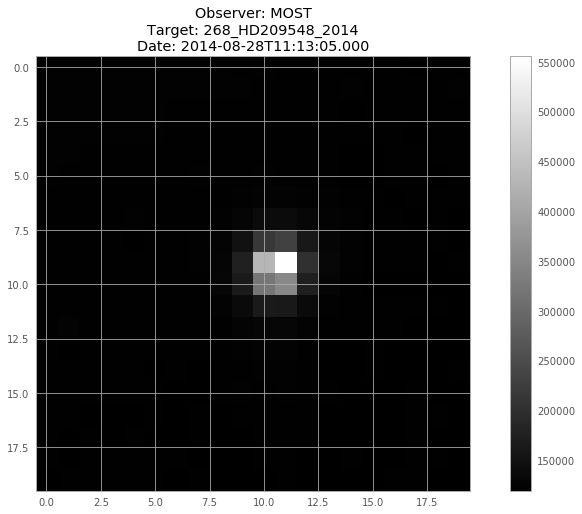

In [107]:
plt.figure(figsize=(14, 8))
plt.imshow(data, cmap="gray")
plt.colorbar()

plt.title("Observer: {}\nTarget: {}\nDate: {}".format(hdr["OBSERVER"], hdr["TARGET"], hdr["DATE-OBS"]))
plt.show()

In [108]:
hdr["ERR_NUMB"]

128